In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
mypath = r'C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\RunTime_Min'
mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\Results_T1"
f = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    filenames
    break


In [4]:
number_of_configurations = len(dirnames)
number_instances_per_config = len(os.listdir(mypath + '/' + dirnames[0])) - 1


In [5]:
number_of_configurations, number_instances_per_config


(4, 28)

In [6]:
print("Folders")
dir_name_list = []
count = 0
for i, dirname in enumerate(dirnames):
    count += 1
    dir_name_list.append(dirname)
    print(i, ' ', dirname)
    


Folders
0   MC_14_Trial__22_12_03_03_58_DEFAULT
1   MC_14_Trial__22_12_03_06_21
2   MC_14_Trial__22_12_03_09_15
3   MC_14_Trial__22_12_03_11_47


In [11]:
config_num = 0
instance_num = 0


def text_to_float(text):
    return float(text.split('= ')[-1].split(' \n')[0])


def retrieve_instance_result(config_num, instance_num):
    """
    returns runtime and objective for a given configuration and instance number
    """
    path = mypath + '/' + dirnames[config_num]
    instance_filename = f'instance_{instance_num}.txt'

    if instance_filename in os.listdir(path):
        with open(path + '/' + instance_filename) as f:
            contents = f.readlines()

    rt = text_to_float(contents[-3])
    obj = text_to_float(contents[-2])

    return rt, obj


In [14]:
xy = retrieve_instance_result(0, 0)
xy


(353.8899999999994, 143.76666666666677)

In [15]:
instance_num_list = []
number_instances_per_config = (os.listdir(mypath + '/' + dirnames[0]))
for name in number_instances_per_config:
    if name[0] == 'i':
        instance_num_list.append(name)
len(instance_num_list)

14

In [16]:
def get_metric_over_all_instances(config_num, metric):
    """
    Gets the runtime or obj for a given configuration number
    """
    number_of_configurations = len(dirnames)
    find_inst = os.listdir(mypath + '/' + dirnames[config_num])

    instance_num_list = []

    for name in find_inst:
        if name[0] == 'i':
            instance_num_list.append(name)

    metric_vals = []

    for instance_num in range(len(instance_num_list)):
        rt, obj = retrieve_instance_result(config_num, instance_num)

        if metric == 'runtime':
            metric_vals.append(rt)

        elif metric == 'obj':
            metric_vals.append(obj)

    return metric_vals


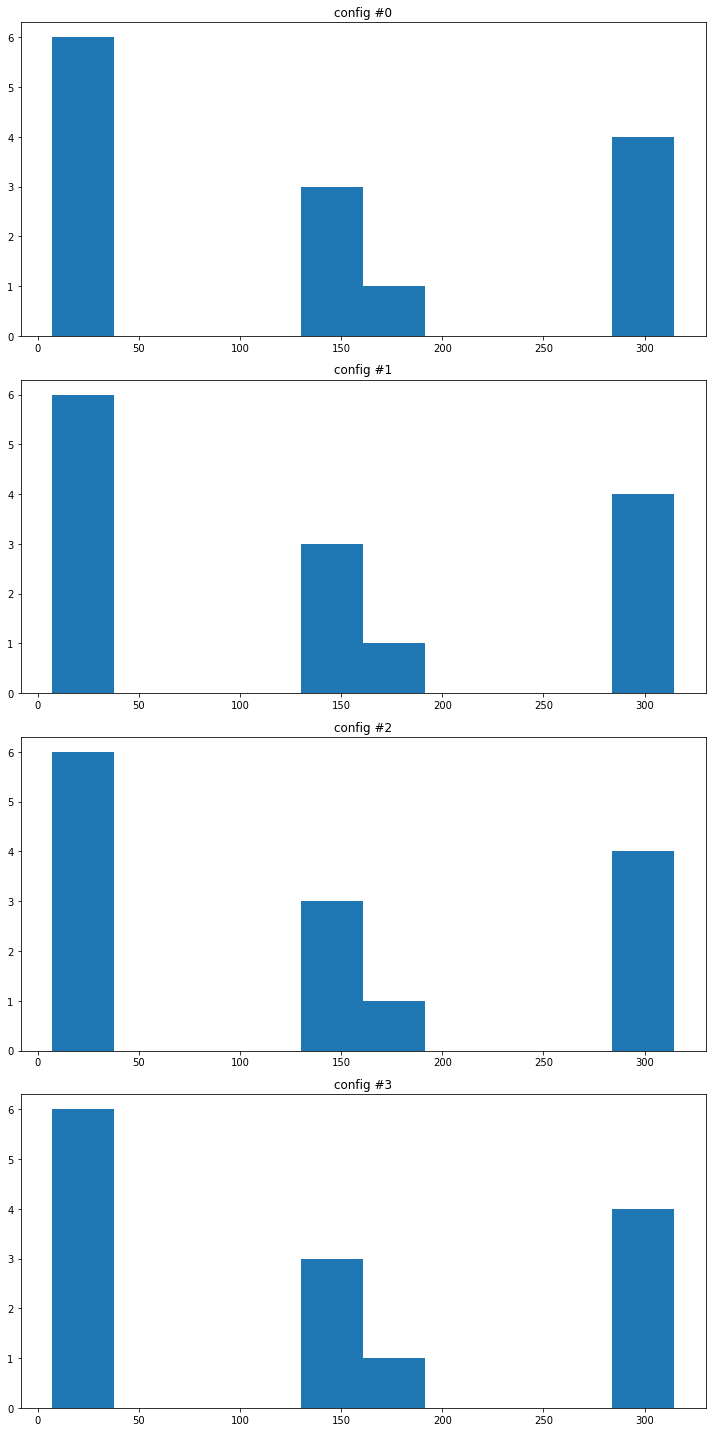

In [17]:
fig, ax = plt.subplots(number_of_configurations, 1, figsize=(10, 20))
metric = 'obj'


for config_num in range(number_of_configurations):
    metric_vals = get_metric_over_all_instances(
        config_num=config_num, metric=metric)
    # print(metric_vals)
    ax[config_num].hist(metric_vals)
    ax[config_num].set_title(f'config #{config_num}')

fig.tight_layout()


In [18]:
find_inst = os.listdir(mypath + '/' + dirnames[0])

instance_num_list = []

for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name)
instance_num_list


['instance_0.txt',
 'instance_1.txt',
 'instance_10.txt',
 'instance_11.txt',
 'instance_12.txt',
 'instance_13.txt',
 'instance_2.txt',
 'instance_3.txt',
 'instance_4.txt',
 'instance_5.txt',
 'instance_6.txt',
 'instance_7.txt',
 'instance_8.txt',
 'instance_9.txt']

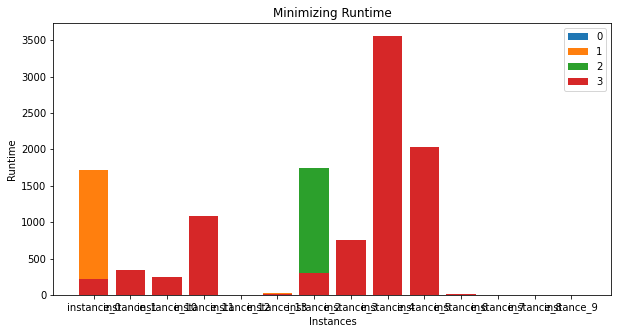

In [19]:
#plot names
batch_list = []
runtime_list = []
folder_instance = []
instance_num_list = []



find_inst = os.listdir(mypath + '/' + dirnames[0])
for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name[:-4])
        
#folder_instance = [instance_num_list] * count
plt.figure(figsize=(10, 5))
for i in range(0, count):
    folder_instance.append(instance_num_list)    
    batch_list = []
    label_list = []
    for j in range(0, len(instance_num_list)):
        batch = retrieve_instance_result(i, j)
        batch_list.append(batch[0])
    runtime_list.append(batch_list[:len(instance_num_list)])
    plt.bar(folder_instance[i], runtime_list[i], label=i)
    plt.title(f'Minimizing Runtime')
    plt.xlabel("Instances")
    plt.ylabel("Runtime")
    plt.legend()
        
        
        

In [20]:
len(folder_instance[0]), len(runtime_list[0])

(14, 14)

In [21]:
#plot names
batch_list = []
list_batch = []
folder_instance = []
instance_num_list = []



find_inst = os.listdir(mypath + '/' + dirnames[0])
for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name[:-4])
        
#folder_instance = [instance_num_list] * count
plt.figure(figsize=(10, 5))
for i in range(0, count):
    folder_instance.append(instance_num_list)    
    batch_list = []
    label_list = []
    for j in range(0, len(instance_num_list)):
        batch = retrieve_instance_result(i, j)
        batch_list.append(batch[0])
        
    list_batch.append(batch_list[:len(instance_num_list)])
 
        

<Figure size 720x360 with 0 Axes>

In [22]:
list_batch

[[353.8899999999994,
  278.6409999999887,
  138.70299999999406,
  249.70300000000861,
  1.639999999999418,
  7.062999999994645,
  123.17199999999139,
  448.1869999999908,
  1057.3910000000033,
  530.1720000000059,
  3.311999999990803,
  2.7030000000086147,
  2.3439999999973224,
  3.8909999999887077],
 [1710.1879999999946,
  272.92200000000594,
  105.71899999999732,
  245.57800000000861,
  1.9059999999881256,
  19.64100000000326,
  278.6560000000027,
  429.43700000000536,
  1790.1100000000006,
  526.625,
  5.375,
  2.8590000000112923,
  3.047000000005937,
  4.171999999991385],
 [117.28199999999197,
  267.5,
  149.11000000000058,
  240.78099999998813,
  3.7339999999967404,
  16.514999999999418,
  1737.922000000006,
  439.125,
  567.281999999992,
  537.2810000000027,
  18.610000000000582,
  3.125,
  4.2810000000026776,
  3.827999999994063],
 [224.61000000000058,
  336.7960000000021,
  246.71799999999348,
  1078.202999999994,
  4.218000000008033,
  12.218999999997322,
  306.3439999999973,


In [23]:
#plot names
obj_list = []
runtime_list = []
folder_instance = []
instance_num_list = []
retrieve_instance_result_list = []


find_inst = os.listdir(mypath + '/' + dirnames[0])
for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name[:-4])
        
#folder_instance = [instance_num_list] * count
plt.figure(figsize=(10, 5))
for i in range(0, count):
    folder_instance.append(instance_num_list)    
    runtime = []
    label_list = []
    obj = []
    for j in range(len(instance_num_list)):
        batch = retrieve_instance_result(i, j)
        retrieve_instance_result_list.append(batch)
        runtime.append(batch[0])
        obj.append(batch[1])
        
    runtime_list.append(runtime[:len(instance_num_list)])
    obj_list.append(obj[:len(instance_num_list)])

<Figure size 720x360 with 0 Axes>

In [28]:
retrieve_instance_result_list

[(353.8899999999994, 143.76666666666677),
 (278.6409999999887, 290.69999999999993),
 (138.70299999999406, 158.0),
 (249.70300000000861, 292.70000000000005),
 (1.639999999999418, 7.0),
 (7.062999999994645, 11.0),
 (123.17199999999139, 148.58333333333331),
 (448.1869999999908, 303.6666666666667),
 (1057.3910000000033, 164.93333333333334),
 (530.1720000000059, 314.8),
 (3.311999999990803, 20.0),
 (2.7030000000086147, 26.0),
 (2.3439999999973224, 14.0),
 (3.8909999999887077, 17.0),
 (1710.1879999999946, 143.7666666666667),
 (272.92200000000594, 290.69999999999993),
 (105.71899999999732, 158.0),
 (245.57800000000861, 292.70000000000005),
 (1.9059999999881256, 7.0),
 (19.64100000000326, 11.0),
 (278.6560000000027, 148.58333333333334),
 (429.43700000000536, 303.6666666666667),
 (1790.1100000000006, 164.93333333333334),
 (526.625, 314.8),
 (5.375, 20.0),
 (2.8590000000112923, 26.0),
 (3.047000000005937, 14.0),
 (4.171999999991385, 17.0),
 (117.28199999999197, 143.76666666666668),
 (267.5, 290.

In [52]:
folder_instance[0]

['instance_0',
 'instance_1',
 'instance_10',
 'instance_11',
 'instance_12',
 'instance_13',
 'instance_2',
 'instance_3',
 'instance_4',
 'instance_5',
 'instance_6',
 'instance_7',
 'instance_8',
 'instance_9']

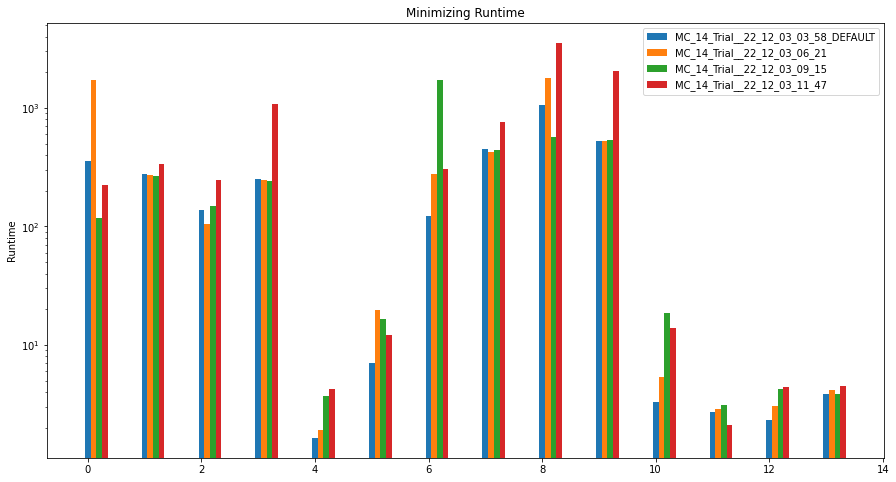

In [63]:
plt.figure(figsize=(15, 8))
X = np.arange(14)
plt.bar(X, runtime_list[0], label=i, width = 0.1)
plt.bar(X + 0.1, runtime_list[1], width = 0.1)
plt.bar(X + 0.2, runtime_list[2], width = 0.1)
plt.bar(X + 0.3, runtime_list[3], width = 0.1)
plt.title(f'Minimizing Runtime')
plt.ylabel("Runtime")
plt.legend([dir_name_list[0], dir_name_list[1], dir_name_list[2], dir_name_list[3]])
plt.yscale('log')

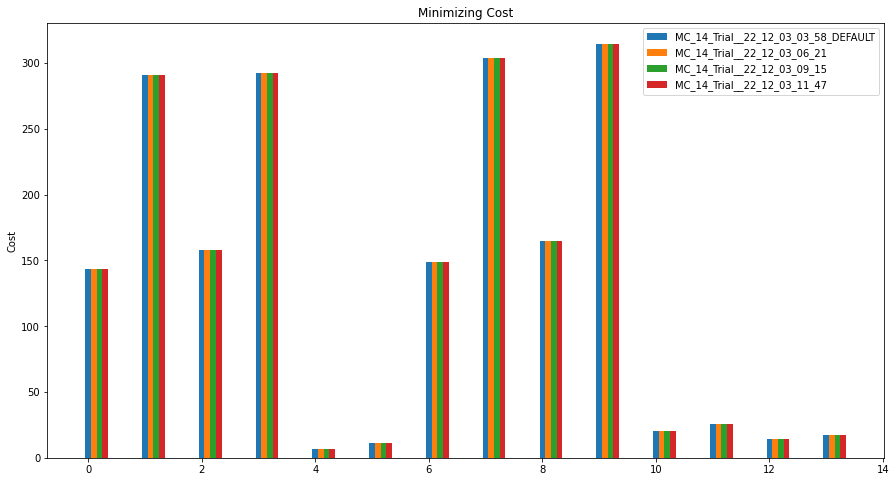

In [66]:
plt.figure(figsize=(15, 8))
X = np.arange(14)
plt.bar(X, obj_list[0], label=i, width = 0.1)
plt.bar(X + 0.1, obj_list[1], width = 0.1)
plt.bar(X + 0.2, obj_list[2], width = 0.1)
plt.bar(X + 0.3, obj_list[3], width = 0.1)
plt.title(f'Minimizing Cost')
plt.ylabel("Cost")
plt.legend([dir_name_list[0], dir_name_list[1], dir_name_list[2], dir_name_list[3]])


In [ ]:
retrieve_instance_result_list

[(0.20299999999406282, 2.0),
 (0.17200000000593718, 2.0),
 (0.21899999999732245, 2.0),
 (0.15600000000267755, 2.0),
 (0.20299999999406282, 3.0),
 (0.21799999999348074, 2.0),
 (0.17100000000209548, 2.0),
 (0.17200000000593718, 2.0),
 (0.14100000000325963, 2.0),
 (0.17199999999138527, 3.0),
 (0.15600000000267755, 2.0),
 (0.15600000000267755, 2.0),
 (0.17199999999138527, 2.0),
 (0.125, 2.0),
 (0.15600000000267755, 3.0),
 (0.1879999999946449, 2.0),
 (0.15600000000267755, 2.0),
 (0.15600000000267755, 2.0),
 (0.14100000000325963, 2.0),
 (0.17100000000209548, 3.0),
 (0.17200000000593718, 2.0),
 (0.15600000000267755, 2.0),
 (0.17199999999138527, 2.0),
 (0.125, 2.0),
 (0.17200000000593718, 3.0),
 (0.17199999999138527, 2.0),
 (0.15700000000651926, 2.0),
 (0.17200000000593718, 2.0),
 (0.125, 2.0),
 (0.15600000000267755, 3.0)]

In [ ]:
import pandas as pd

In [ ]:
file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\RunTime_Min\RunTime_min_20215_22_11_30_20_29\DF_Schedual_3.csv"
df_schedule = pd.read_csv(file)
df_schedule.drop(["Unnamed: 0"],axis=1)
display(df_schedule)

,Unnamed: 0,timeslot,EXAM,TIMESLOT,ROOM,student
0,0,0,CIV209H1S,2022-04-11 : 09:00:00,MY 150,"['0x040A83A3B3AEB4C173230603CAFA5B6A53C0CB6B',..."
1,1,0,MSE218H1S,2022-04-11 : 09:00:00,MY 150,"['0x16E0F9E83E8DE118DE805A26F14ECCE8596B4301',..."
2,2,0,AER406H1S,2022-04-11 : 09:00:00,MY 150,"['0x19183D10E7C928665B0217C6B548FCB104895C7E',..."
3,3,0,CHE375H1S,2022-04-11 : 09:00:00,MY 150,['0x0139C76838AF4F1AEF9D9DD3E265112DF350A7C8']
4,4,0,CHE354H1S,2022-04-11 : 09:00:00,MY 150,"['0x01FB7BEBE6FC77C198955614518CA4C726D88CC2',..."
...,...,...,...,...,...,...
95,95,63,ECE159H1S,2022-04-30 : 14:00:00,HA 410,"['0x11505C1518002EBC5576B13A432AC72DAAA64A9D',..."
96,96,63,MIE313H1S,2022-04-30 : 14:00:00,BA 1170,"['0x1CFFB148EC204C8767EDE3F05DA36466A328FE24',..."
97,97,63,ECE350H1S,2022-04-30 : 14:00:00,BA 1160,['0x083FA141B21971D8043DB6650C9A46311EACE330']
98,98,63,APS105H1S_1,2022-04-30 : 14:00:00,EX 300,"['0x19729D7CA76EFB19569798455CDC0DB3D57E6C52',..."
